# ÖN HAZIRLIK ÇALIŞMASI

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

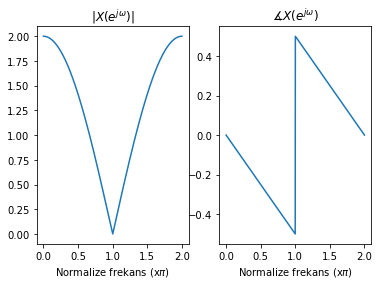

In [78]:
w_cont=np.linspace(0,2*np.pi,1000)

X_phase=np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])
i = 0
X_abs=np.zeros(1000)
for w in w_cont:
    
    X_abs[i]=np.abs(2*np.cos(w/2))
    i+=1

plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase/np.pi)
plt.title('$ \measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

In [79]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0

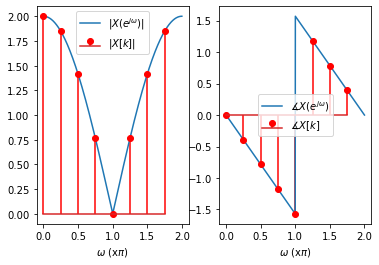

In [80]:
N=8
X_k=np.zeros([N],dtype=complex)
for k in range(N):
    for n in range(N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)

plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,'r-',label='$|X[k]|$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$ \measuredangle X[k]$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

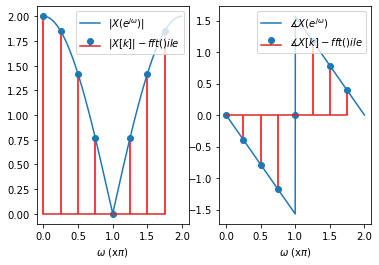

In [81]:
from scipy.fftpack import fft , ifft
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
## Grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

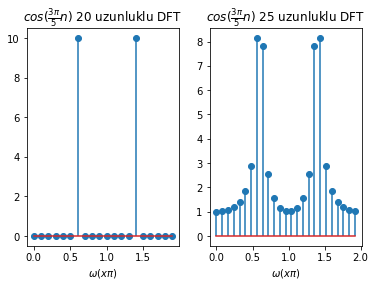

In [82]:
from scipy.fftpack import fft , ifft
#20 uzunluklu versiyon
n1=np.arange(0,20)
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1))
w_disc_1=n1*2*np.pi/len(n1) #0-2pi arası 2pi/20 adımlı vektör (2pi noktası dahil değil)
plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 20 uzunluklu DFT')
#25 uzunluklu versiyon
n2=np.arange(0,25)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2) #0-2pi arası 2pi/25 adımlı vektör (2pi noktası dahil değil)
plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times \\pi)=\\measuredangle a_k(\\times \\pi)$')

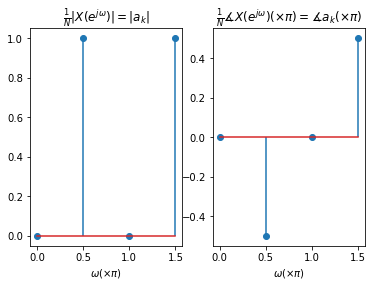

In [83]:
from scipy.fftpack import fft , ifft
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/4 adımlı vektör
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times \pi)=\measuredangle a_k(\\times \pi)$')

# ÖDEV 3 


# 3-1)


# 1-a)

## $X(e^{jw}) = \sum_{n=-\infty}^\infty x[n] e^{-jwn}$ 

## Yukarıda ayrık zamanlı fourier seri açılımı görülmektedir. Bu formül $ h[n] = \delta [n] - \delta [n - 1] $ için uyarlandığında

# $H(e^{jw}) = \sum_{n=-\infty}^\infty h[n] e^{-jwn} \Rightarrow(Linearity)\Rightarrow H(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n] e^{-jwn} - \sum_{n=-\infty}^\infty \delta[n - 1] e^{-jwn}$ 

# $H_1(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n] e^{-jwn} =e^{-jw0} = 1 $

# $H_2(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n - 1] e^{-jwn} =e^{-jw1} = e^{-jw} $

# $ H(e^{jw}) = H_1(e^{jw}) - H_2(e^{jw}) = \mathtt{1 - e^{-jw}}$
# $****** H(e^{jw}) = \mathtt{1 - e^{-jw}} *********$ 
# $ 1 = (e^{-jw/2}) * (e^{+jw/2})$
# $ e^{-jw} = (e^{-jw/2}) * (e^{-jw/2}) $

# $ 1 - e^{-jw} = (e^{-jw/2}) * (e^{+jw/2}) - (e^{-jw/2}) * (e^{-jw/2}) $
# $ = (e^{-jw/2})[ (e^{+jw/2}) - (e^{-jw/2}) ] = 2j(e^{-jw/2})\frac{[ (e^{+jw/2}) - (e^{-jw/2}) ]}{2j} $ 

# $ = 2j(e^{-jw/2})sin (\frac {\omega}{2}) = 2e^{j(\frac{-w +\pi }{2})}sin( \frac {\omega} {2}) $

# $****** H(e^{jw}) = \mathtt{2e^{j(\frac{-w +\pi }{2})}sin( \frac {\omega} {2})} ******$ 




Text(0.5, 0, 'w(x$\\pi$)')

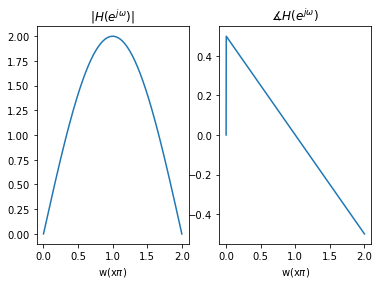

In [84]:
w_cont=np.linspace(0,2*np.pi,1000)

H_phase=np.zeros(1000)
H_abs=np.zeros(1000)
i = 0
for w in w_cont:
    
    #H_abs[i]=np.abs(1 - np.exp(-1j*w))
    #H_phase[i] = np.angle(1 - np.exp(-1j*w))
    H_abs[i] = np.abs(2*np.exp(-1j*w/2+1j*np.pi/2)*np.sin(w/2))
    H_phase[i] = np.angle(2*np.exp(-1j*w/2+1j*np.pi/2)*np.sin(w/2))
    i+=1

plt.subplot(121)
plt.plot(w_cont/np.pi,H_abs)
plt.title('$|H(e^{j\omega})|$')
plt.xlabel('w(x$\pi$)')
plt.subplot(122)
plt.plot(w_cont/np.pi,H_phase/np.pi)
plt.title('$ \measuredangle H(e^{j\omega})$')
plt.xlabel('w(x$\pi$)')

# Sistemin genlik ve fazının doğruluğu 1a) şıkkında son adımda elde edilen 
# sinyalden rahatça gözlenebilmektedir.

# 1-b)

## $ \omega $, $ 2 \pi $ periyodiktir. Bu durumda frekans cevabının genliği incelendiğinde, genliğin çift bir sinyal olması frekans cevabının alçak geçiren karakteristikte olduğunu göstermektedir.

# 1-c)

In [85]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0

Text(0.5, 1.0, '$\\measuredangle H([k])$')

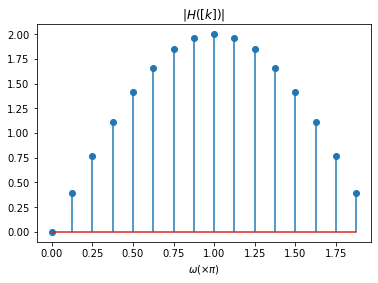

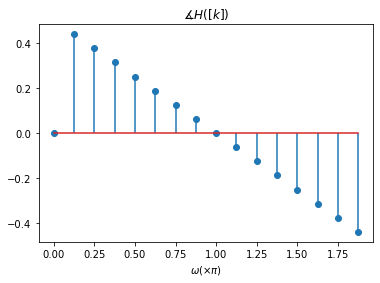

In [86]:
from scipy.fftpack import fft , ifft
h = np.linspace(0,15,16)

for n in range(len(h)):
    
    h[n] = dirac(n) - dirac(n-1)
    

N=len(h)
n=np.linspace(0,15,16)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/16 adımlı vektör

# fourier transformun genlik ve faz atamaları
X_abs=np.abs(fft(h))
X_phase=np.angle(fft(h))


plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\|H([k])|$')
plt.figure()
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\measuredangle H([k])$')

# 3-2)

Text(0.5, 1.0, '$\\measuredangle X(e^{j\\omega})(\\times \\pi)$')

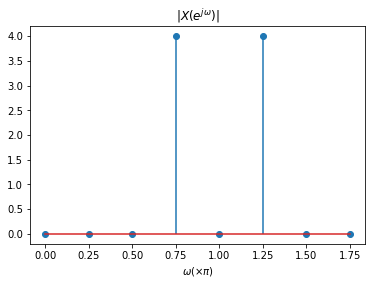

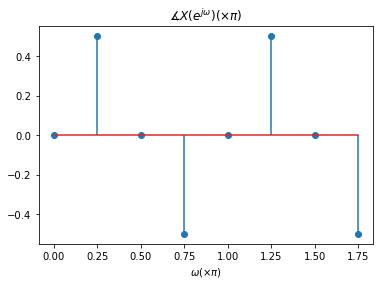

In [87]:
from scipy.fftpack import fft , ifft

x = [0, 0.707106, -1, 0.707106, 0, -0.707106, 1, -0.707106]

N=len(x)
n=np.linspace(0,7,8)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/8 adımlı vektör
X_abs=np.abs(fft(x))
X_phase=np.angle(fft(x))


plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\|X(e^{j\omega})|$')
plt.figure()
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\measuredangle X(e^{j\omega})(\\times \pi)$')

## A, $ \omega_0 $ ve $ \phi $ değerlerini bulabilmek için grafiklerin $ \frac {1} {N} $ katları elde edilmelidir. Bu grafikler aşağıda verilmiştir.

<built-in function len>


Text(0.5, 1.0, '$\\measuredangle X(e^{j\\omega})(\\times \\pi)$')

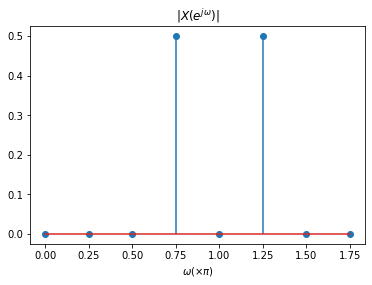

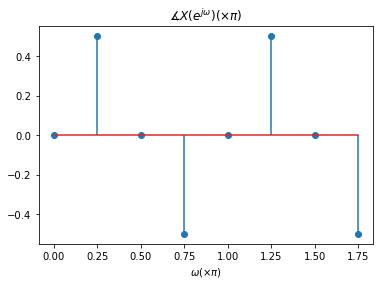

In [88]:
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
print(len)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\|X(e^{j\omega})|$')
plt.figure()
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\measuredangle X(e^{j\omega})(\\times \pi)$')

## A, $ \omega_0 $ ve $ \phi $ değerlerini bulabilmek için DFS sentez denklemi kullanılır. Bu denklem genlikte değer alan noktaları fazlarını da işleyip bir x[n] elde etmeyi amaçlar. 

# x[n] = $ \sum_{k=0}^{N-1} a_ke^{j\frac{2\pi}{N}kn} = a_3e^{j 0.75 \pi n} + a_5e^{j 1.25 \pi n}   $ 

 # $ a_3 = |a_3|e^{\measuredangle a_3} = 0.5e^{-j\frac{\pi}{2}} $
 # $ a_5 = |a_5|e^{\measuredangle a_5} = 0.5e^{j\frac{\pi}{2}} $
 # $ a_3e^{j 0.75 \pi n} + a_5e^{j 1.25 \pi n} = 0.5e^{-j\frac{\pi}{2}}e^{j 0.75 \pi n} + 0.5e^{j\frac{\pi}{2}} e^{j 1.25 \pi n}  $ 
 # $ \Rightarrow (1.25\pi = - 0.75 \pi) \Rightarrow 0.5e^{-j\frac{\pi}{2}}e^{j 0.75 \pi n} + 0.5e^{j\frac{\pi}{2}} e^{j (-0.75) \pi n}  $ 
 # $ \Rightarrow 0.5e^{j( 0.75 \pi n - \frac{\pi}{2} )} + 0.5e^{-j( 0.75 \pi n - \frac{\pi}{2} )}  $ 
 # $ \Rightarrow 2*0.5*\frac{e^{j( 0.75 \pi n - \frac{\pi}{2} )} + e^{-j( 0.75 \pi n - \frac{\pi}{2} )}}{2} $
 # $ \Rightarrow 1*cos( 0.75 \pi n - \frac{\pi}{2} )$
 # Buradan, A = 1, $ \omega_0 =  0.75 \pi $ , $ \phi =  - \frac{\pi}{2}  $ bulunur.
 

# 3-3)

In [89]:
w_cont=np.linspace(0,2*np.pi,1000)

H_phase=np.zeros(1000)
H_abs=np.zeros(1000)
i = 0
index = 0
for w in w_cont:
    
    if (w >= (np.pi/3 - 0.01)) and (w <= (np.pi/3 + 0.01)):
        index = i
    H_abs[i]=np.abs(1 - np.exp(-1j*w))
    H_phase[i] = np.angle(1 - np.exp(-1j*w))
    i+=1
    
print(index)
H_abs_pi_3 = H_abs[index]
H_phase_pi_3 = H_phase[index]

print("Amplitude of H(e^(j*pi/3)) = {}".format(H_abs_pi_3))
print("Angle of H(e^(j*pi/3)) = {}".format(H_phase_pi_3))


168
Amplitude of H(e^(j*pi/3)) = 1.0081591115826491
Angle of H(e^(j*pi/3)) = 1.0424804451101266


[ 0.5081924 -0.4999555 -1.0081479 -0.5081924  0.4999555  1.0081479
  0.5081924 -0.4999555 -1.0081479 -0.5081924  0.4999555]


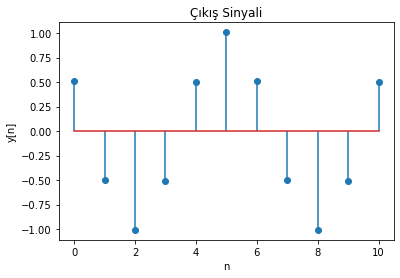

In [90]:
n = np.linspace(0,10,11)
y = np.zeros(11)
pi = np.pi
for i in range(len(n)):
    y[i] = H_abs_pi_3 * np.cos((pi*i/3) + H_phase_pi_3)
print(y)

n = np.linspace(0,10,11)

plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Çıkış Sinyali')
plt.stem(n,y)

plt.show()

# $ |H(e^{\frac{j\pi}{3}})| = 1.0081591115826491 $
# $ \measuredangle H(e^{\frac{j\pi}{3}}) = 1.0424804451101266 $